In [6]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv (r"C:\Users\adity\Downloads\linkedin-reviews.csv")

In [8]:
df.head(10)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
5,This app is poor and bad. Linkedin app on my H...,1
6,Finally,5
7,Have been using DroidIn. Ability to move to SD...,4
8,Works fine on Samsung Captivate.,4
9,Clean design with limited features. How about ...,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# EDA

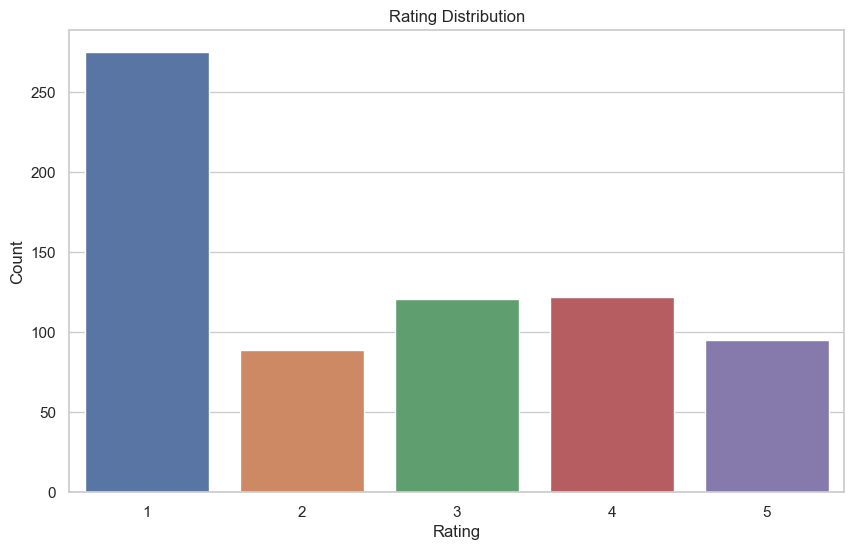

In [10]:
#plotting distribution of ratings
sn.set(style='whitegrid')
plt.figure(figsize=(10,6))
sn.countplot(data=df, x='Rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
#Calculating the length of the reviews
df['Review Length'] = df['Review'].apply(len)

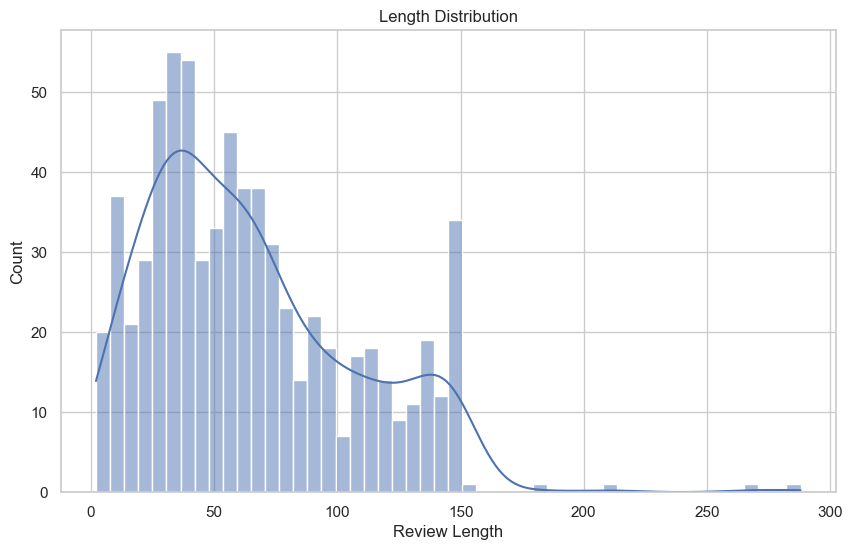

In [12]:
#plotting it
plt.figure(figsize=(10,6))
sn.histplot (df['Review Length'], bins =50, kde=True)
plt.title('Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

# Adding SENTIMENT to the data (how positive or how negative are the ratings)

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

In [15]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
  

In [16]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)
    
df.head(10)

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive
5,This app is poor and bad. Linkedin app on my H...,1,68,Negative
6,Finally,5,7,Neutral
7,Have been using DroidIn. Ability to move to SD...,4,97,Neutral
8,Works fine on Samsung Captivate.,4,32,Positive
9,Clean design with limited features. How about ...,3,98,Positive


In [19]:
#Analysing the distribution of sentiments
sentiment_dist = df['Sentiment'].value_counts()

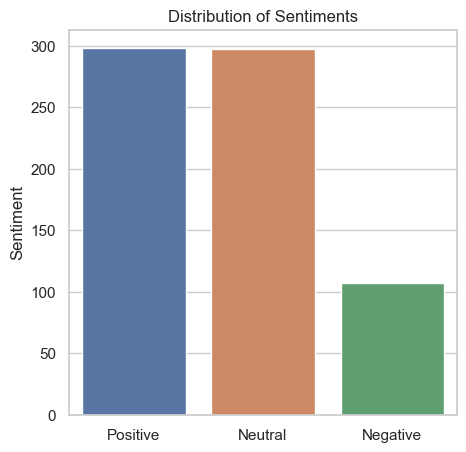

In [20]:
plt.figure(figsize=(5,5))
sn.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
plt.title('Distribution of Sentiments')
plt.ylabel('Sentiment')
plt.show()

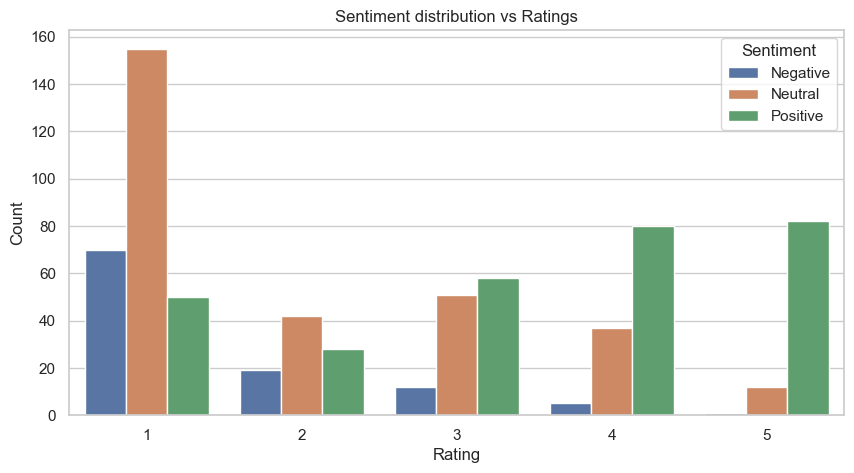

In [21]:
#ratings vs sentiments
plt.figure(figsize=(10,5))
sn.countplot(data=df,x='Rating', hue='Sentiment')
plt.title('Sentiment distribution vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


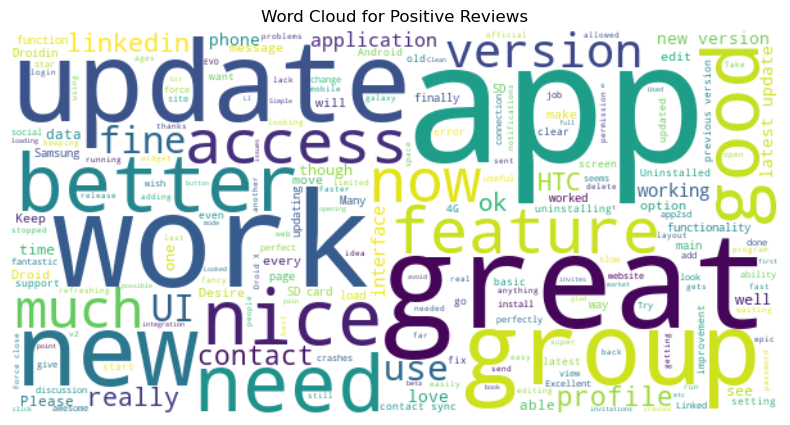

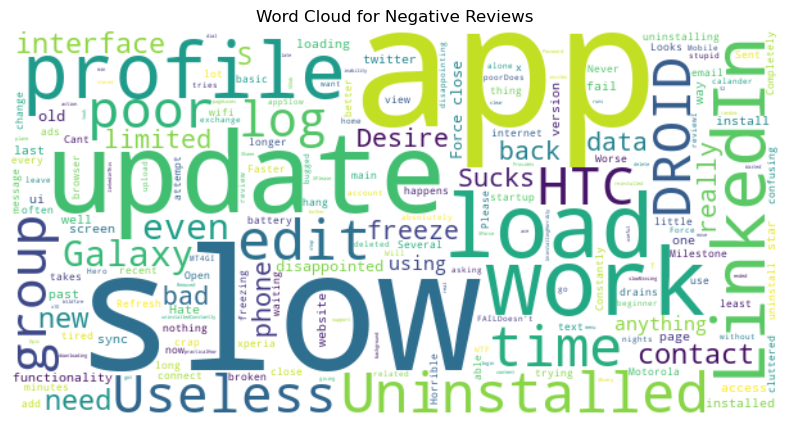

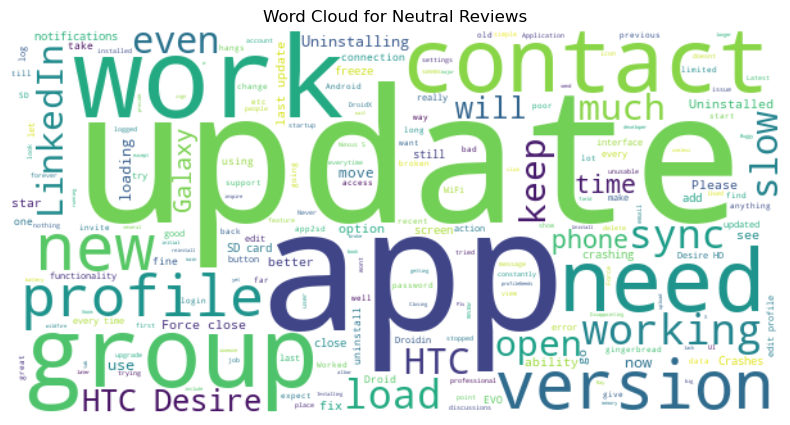

In [15]:
#Making a WordCloud plot

from wordcloud import WordCloud
def generate_word_cloud(sentiment):
    text=''.join(review for review in df[df['Sentiment']==sentiment]['Review'])
    wordcloud = WordCloud(width=600, height=300, background_color = 'white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
     #Generating wordcloud for each sentiment
for sentiment in ['Positive','Negative','Neutral']:
    generate_word_cloud(sentiment)
   

In [26]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nlp = spacy.load('en_core_web_sm')
df = pd.read_excel(r"C:\Users\adity\Downloads\articles.xlsx")

In [27]:
import pandas as pd
df = pd.read_excel(r"C:\Users\adity\Downloads\articles.xlsx")


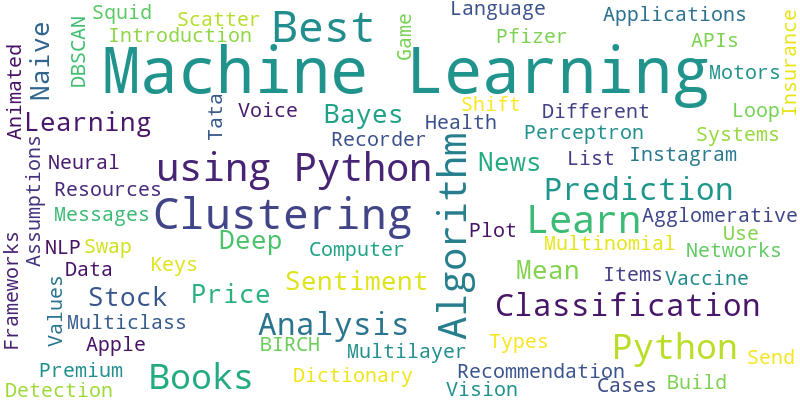

In [28]:
# Combining all titles into a single string
titles_text = ' '.join(df['Title'])

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(titles_text)

# Plot the Word Cloud
fig = px.imshow(wordcloud, title = 'Word Cloud of Titles')
fig.update_layout(showlegend = False)
fig.show()

In [29]:
#Named Entity Recognition (NER)
def extract_named_entities (text):
    doc=nlp(text)
    entities=defaultdict(list)
    for ent in doc.ents:
        entities[ent.label].append(ent.text)
        return dict(entities)
df['Named_Entities']=df['Article'].apply(extract_named_entities)

In [30]:
#Visualizing NAMED ENTITY RECOGNITION (NER) MODEL
entity_counts = Counter(entity for entities in df['Named_Entities']  if entities is not None for entity in entities)
entity_df=pd.DataFrame.from_dict(entity_counts, orient = 'index').reset_index()
entity_df.columns=['Entity','Count']
fig=px.bar(entity_df.head(10), x='Entity',y='Count',title='Top 10 Named Entities')
fig.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(df['Article'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

In [32]:
import plotly.express as px

# Create topic names 
topic_names = ['Topic'+str(i) for i in range(lda_model.n_components)]

# Get dominant topic for each document
df['Dominant Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)] 

# Plot distribution
fig = px.bar(df['Dominant Topic'].value_counts().reset_index(),
             x='index', 
             y='Dominant Topic',
             title='Topic Distribution') 
fig.show()